# Exploratory Data Analysis and Data Visualization

## Importing packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

RSEED = 42

## Loading clean data

In [4]:
df = pd.read_csv('data/Kickstarter_clean.csv', sep=',')

### Success/failure rate of all projects

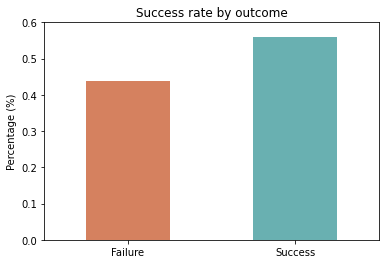

In [9]:
df.target.value_counts(normalize=True).sort_values().plot(kind = 'bar', color=['#d5815f', '#69b0b1'])
plt.xticks([0, 1], ["Failure","Success"], rotation=0)
plt.yticks(np.linspace(0,0.6,7))
plt.ylabel('Percentage (%)')
plt.title('Success rate by outcome')
plt.show();

In [133]:
df.goal.describe()

count    1.689790e+05
mean     4.109688e+04
std      1.110957e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.329770e+04
max      1.523501e+08
Name: goal, dtype: float64

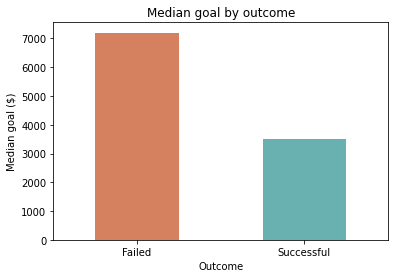

In [12]:
df.groupby('target').goal.median().plot(kind='bar', color=['#d5815f', '#69b0b1'], rot=0)
plt.xticks([0, 1], ["Failed","Successful"], rotation=0)
plt.ylabel('Median goal ($)')
plt.xlabel('Outcome')
plt.title('Median goal by outcome')
plt.show();

## Median goal in USD based on project outcome

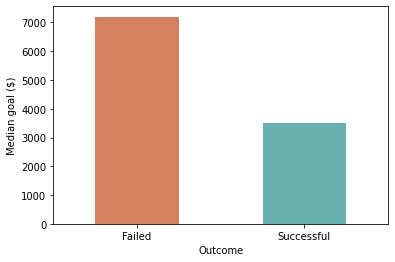

In [13]:
df.groupby('target')['goal'].median().plot(kind='bar', color=['#d5815f', '#69b0b1'], rot=0)
plt.xticks([0, 1], ["Failed","Successful"], rotation=0)
plt.ylabel('Median goal ($)')
plt.xlabel('Outcome')
plt.show();

### Number of projects vs year

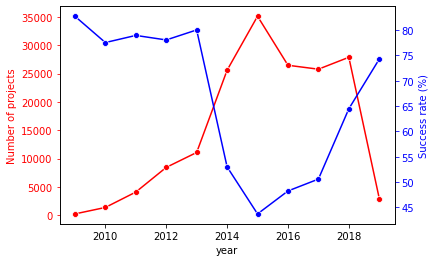

In [59]:
df_plot = df.value_counts('year').rename('count').reset_index()
df_plot2 = df.groupby('year')['target'].value_counts(normalize=True).rename('percent').mul(100).reset_index()
df_plot2 = df_plot2[df_plot2['target'] == 1]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(data=df_plot,x='year',y='count',marker='o',color="red")
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_plot2,x='year',y='percent',marker='o',color="blue")

ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

ax1.set_ylabel('Number of projects',color="red")
ax2.set_ylabel('Success rate (%)',color="blue")

plt.show()

### Number of projects and amount pledged by year

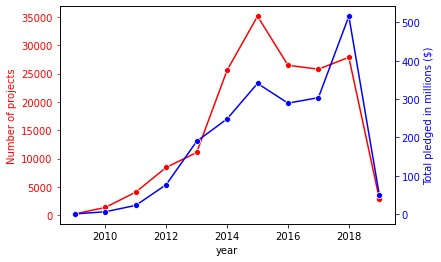

In [76]:
df_plot = df.value_counts('year').rename('count').reset_index()
df_plot2 = df.groupby('year')['usd_pledged'].sum().div(1000000).rename('usd_pledged').reset_index()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(data=df_plot,x='year',y='count',marker='o',color="red")
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_plot2,x='year',y='usd_pledged',marker='o',color="blue")

ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

ax1.set_ylabel('Number of projects',color="red")
ax2.set_ylabel('Total pledged in millions ($)',color="blue")

plt.show()

As the total number of projects increases, the success rate decreases. It could be that as there are more projects on Kickstarter, it becomes harder to get noticed.

### Mean goal by outcome

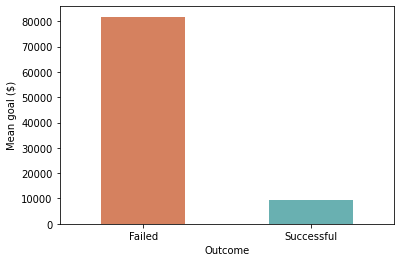

In [39]:
df.groupby('target')['goal'].mean().plot(kind='bar', color=['#d5815f', '#69b0b1'], rot=0)
plt.xticks([0, 1], ["Failed","Successful"], rotation=0)
plt.ylabel('Mean goal ($)')
plt.xlabel('Outcome')
plt.show();

### Median goal by outcome

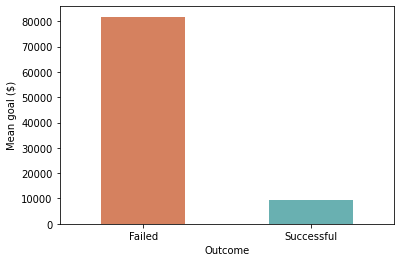

In [60]:
df.groupby('target')['goal'].mean().plot(kind='bar', color=['#d5815f', '#69b0b1'], rot=0)
plt.xticks([0, 1], ["Failed","Successful"], rotation=0)
plt.ylabel('Mean goal ($)')
plt.xlabel('Outcome')
plt.show();

### Mean and median fundraising duration based on project outcome

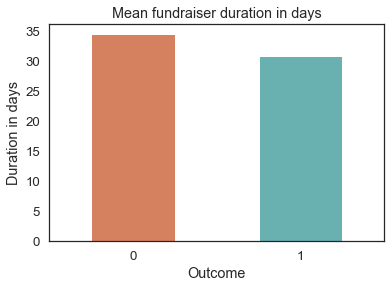

In [141]:
df.groupby('target').duration_days.mean().plot(kind='bar', color=['#d5815f', '#69b0b1'], rot=0)
plt.ylabel('Duration in days')
plt.xlabel('Outcome')
plt.title('Mean fundraiser duration in days')
plt.show();

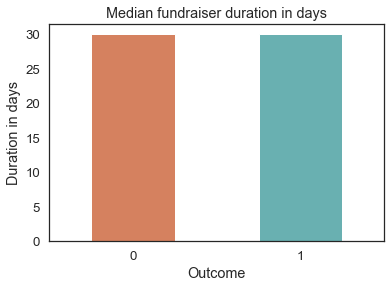

In [140]:
df.groupby('target').duration_days.median().plot(kind='bar', color=['#d5815f', '#69b0b1'], rot=0)
plt.ylabel('Duration in days')
plt.xlabel('Outcome')
plt.title('Median fundraiser duration in days')
plt.show();

### Outcome for top five categories

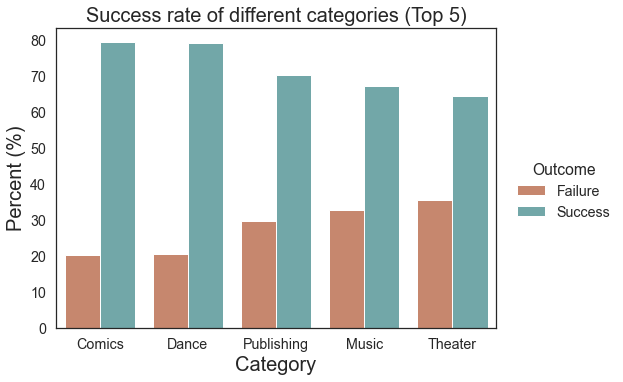

In [31]:
df_plot = df.groupby('category')['target'].value_counts(normalize=True).rename('percent').reset_index()
df_plot['percent'] = df_plot['percent']*100

g = sns.catplot(x="category", y="percent", data=df_plot, hue='target', kind='bar', height=5, aspect=1.6, order=['comics','dance','publishing','music','theater'], palette=sns.color_palette(['#d5815f', '#69b0b1'])).set(title='Outcome of different categories')
g.set_xticklabels(["Comics", "Dance", "Publishing", "Music", "Theater"])
g.set_xlabels("Category", fontsize=20)
g.set_ylabels("Percent (%)", fontsize=20)
plt.title('Success rate of different categories (Top 5)', fontsize=20)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

legend = g._legend
legend.set_title("Outcome")
for t, l in zip(legend.texts,("Failure", "Success")):
    t.set_text(l)

g.fig.subplots_adjust(top=1,right=0.8)


### Outcome by country

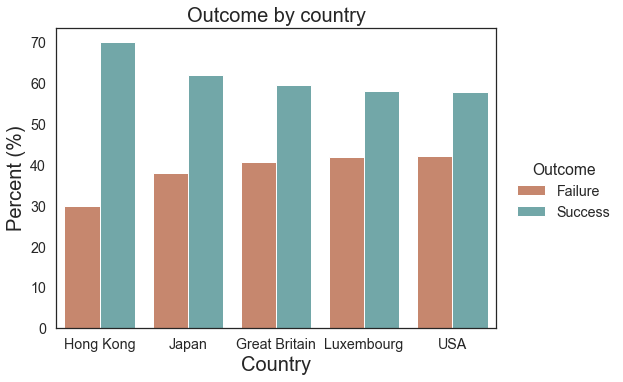

In [23]:
df_plot = df.groupby('country')['target'].value_counts(normalize=True).rename('percent').reset_index()
df_plot['percent'] = df_plot['percent']*100

sns.set(font_scale=1.3)
sns.set_style("white")
g = sns.catplot(x="country", y="percent", data=df_plot, hue='target', kind='bar', height=5, aspect=1.6, order=['HK','JP','GB','LU','US'], palette=sns.color_palette(['#d5815f', '#69b0b1'])).set(title='Outcome for different countries')
g.set_xticklabels(["Hong Kong", "Japan", "Great Britain","Luxembourg","USA"])
g.set_xlabels("Country", fontsize=20)
g.set_ylabels("Percent (%)", fontsize=20)
plt.title('Outcome by country', fontsize=20)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

legend = g._legend
legend.set_title("Outcome")
for t, l in zip(legend.texts,("Failure", "Success")):
    t.set_text(l)

g.fig.subplots_adjust(top=1,right=0.8)


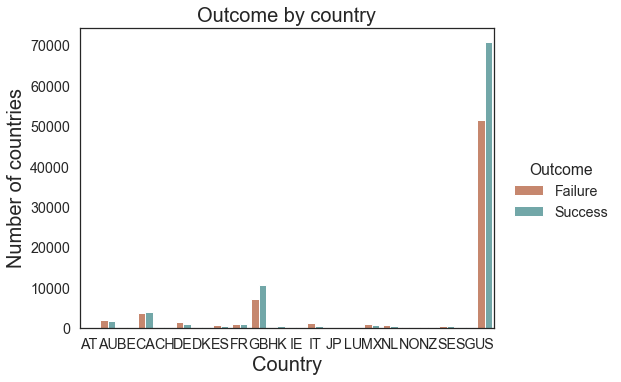

In [97]:
df_plot = df.groupby('country')['target'].value_counts(normalize=False).rename('count').reset_index()
df_plot['log_count'] = np.log(df_plot['count'])
sns.set(font_scale=1.3)
sns.set_style("white")
g = sns.catplot(x="country", y="count", data=df_plot, hue='target', kind='bar', height=5, aspect=1.6, palette=sns.color_palette(['#d5815f', '#69b0b1'])).set(title='Outcome for different countries')
#g.set_xticklabels(["Hong Kong", "Japan", "Great Britain","Luxembourg","USA"])
g.set_xlabels("Country", fontsize=20)
g.set_ylabels("Number of countries", fontsize=20)
plt.title('Outcome by country', fontsize=20)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

legend = g._legend
legend.set_title("Outcome")
for t, l in zip(legend.texts,("Failure", "Success")):
    t.set_text(l)

g.fig.subplots_adjust(top=1,right=0.8)


In [98]:
df.value_counts('country')

country
US    122509
GB     17876
CA      7645
AU      3836
DE      2598
FR      2002
IT      1807
MX      1672
NL      1451
ES      1448
SE      1073
NZ       750
DK       711
HK       657
CH       511
IE       494
SG       469
BE       431
NO       397
AT       373
JP       226
LU        43
dtype: int64

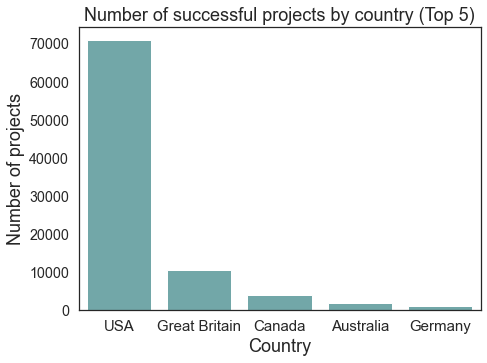

In [99]:
df_plot = df[df['target'] == 1].value_counts('country').rename('count').reset_index().head()
# sns.set(font_scale=1.3)
# sns.set_style("white")
g=sns.catplot(x="country", y="count", data=df_plot, kind='bar', height=5, aspect=1.4, palette=sns.color_palette(['#69b0b1'])).set(title='Number of successful projects by country (Top 5)')
g.set_xticklabels(["USA", "Great Britain", "Canada","Australia","Germany"], fontsize=15)
g.set_xlabels("Country", fontsize=18)
g.set_ylabels("Number of projects", fontsize=18)
plt.title('Number of successful projects by country (Top 5)', fontsize=18)

sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)


### Percentage of successful/failed project that are staff picks

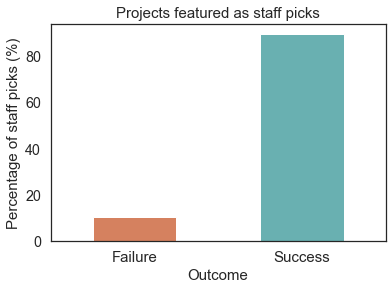

In [100]:
sns.set(font_scale=1.3)
sns.set_style("white")
df_plot = df.groupby('country')['target'].value_counts(normalize=True).rename('percent').reset_index()
df[df['staff_pick'] == 1].value_counts('target', normalize=True).mul(100).sort_values(ascending=True).plot.bar(color=['#d5815f', '#69b0b1'])
plt.xticks([0, 1], ["Failure","Success"], rotation=0, fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.title('Projects featured as staff picks', fontsize=15)
plt.ylabel('Percentage of staff picks (%)', fontsize=15)
plt.show();

### Median donation goal by category and outcome

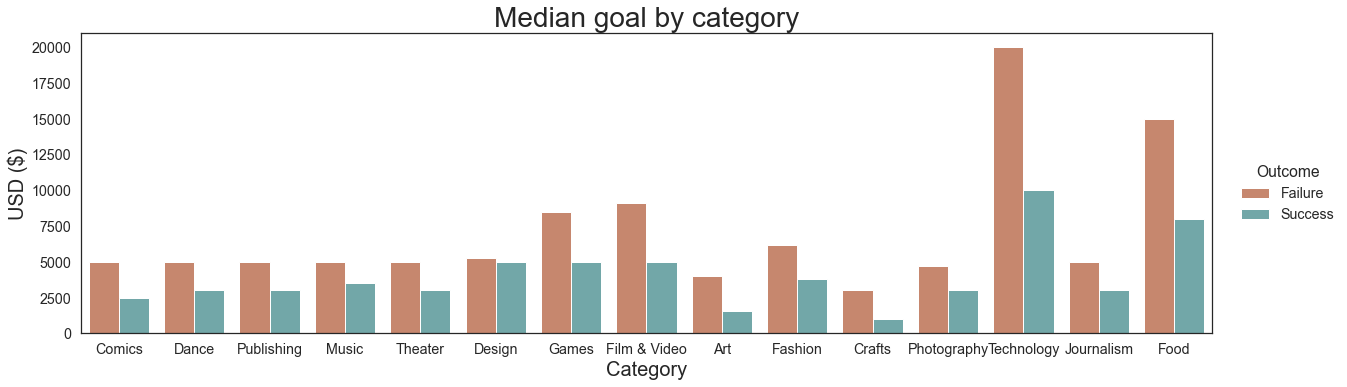

In [81]:
df_plot = df.groupby(['category','target'])['goal'].median().sort_values(ascending=True).rename('goal').reset_index()
cat_order = ['comics', 'dance', 'publishing', 'music', 'theater', 'design', 'games', 'film & video', 'art', 'fashion', 'crafts', 'photography', 'technology', 'journalism', 'food']
g = sns.catplot(x="category", y="goal", data=df_plot, hue='target', kind='bar', height=5, aspect=3.6, order=cat_order, palette=sns.color_palette(['#d5815f', '#69b0b1'])).set(title='Median donation goal by category and outcome')
plt.ylabel('Median goal in USD', fontsize=20)
g.set_xticklabels(["Comics", "Dance", "Publishing", "Music", "Theater", "Design", "Games", "Film & Video", "Art", "Fashion", "Crafts", "Photography", "Technology", "Journalism", "Food"])
g.set_xlabels("Category", fontsize=20)
g.set_ylabels("USD ($)", fontsize=20)
plt.title('Median goal by category', fontsize=28)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

legend = g._legend
legend.set_title("Outcome")
for t, l in zip(legend.texts,("Failure", "Success")):
    t.set_text(l)

g.fig.subplots_adjust(top=1,right=0.9)

### Failure/success rate by category

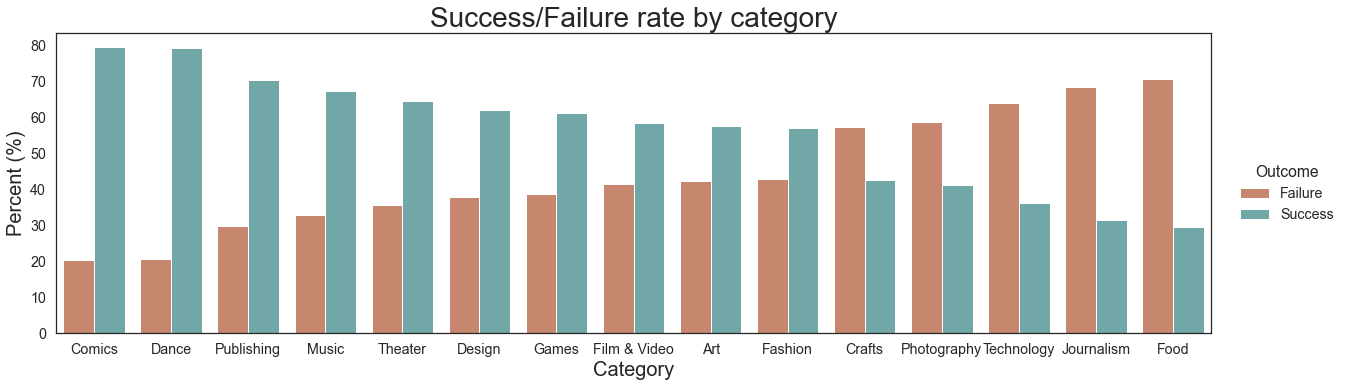

In [82]:
df_plot = df.groupby('category')['target'].value_counts(normalize=True).rename('percent').reset_index()
df_plot['percent'] = df_plot['percent']*100
df_plot = df_plot.sort_values(['target','percent'],ascending=False)

cat_order = ['comics', 'dance', 'publishing', 'music', 'theater', 'design', 'games', 'film & video', 'art', 'fashion', 'crafts', 'photography', 'technology', 'journalism', 'food']

g = sns.catplot(x="category", y="percent", data=df_plot, hue='target', kind='bar', height=5, aspect=3.6, palette=sns.color_palette(['#d5815f', '#69b0b1'])).set(title='Failure/success rate by category and outcome')
g.set_xticklabels(["Comics", "Dance", "Publishing", "Music", "Theater", "Design", "Games", "Film & Video", "Art", "Fashion", "Crafts", "Photography", "Technology", "Journalism", "Food"])
g.set_xlabels("Category", fontsize=20)
g.set_ylabels("Percent (%)", fontsize=20)
plt.title('Success/Failure rate by category', fontsize=28)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

legend = g._legend
legend.set_title("Outcome")
for t, l in zip(legend.texts,("Failure", "Success")):
    t.set_text(l)

g.fig.subplots_adjust(top=1,right=0.9)